<a href="https://colab.research.google.com/github/Angelneer926/Data-Interaction/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Angelneer926/Data-Interaction/main/PersonalityData_ExternalVersion001.csv')
data

,uid,psychopathy,machiavellianism,narcissism,openness,conscientiousness,extraversion,agreeableness,neuroticism,Var1,...,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100
0,1,2.444444,3.4,3.444444,7.0,6.0,5.5,3.5,3.5,48.59,...,4.86,1.31,2.05,0.66,0.92,1.14,4.37,0.71,15.11,45.70
1,2,1.888889,2.4,2.777778,7.0,4.5,6.0,3.0,5.5,41.29,...,8.28,0.04,0.46,2.34,2.99,0.38,1.46,2.83,21.90,53.49
2,3,1.111111,3.0,3.444444,5.5,6.0,6.0,6.5,3.0,14.65,...,3.07,0.20,2.63,1.72,0.64,0.42,2.74,0.11,10.13,32.77
3,4,1.888889,3.0,2.444444,5.0,3.5,2.0,6.5,1.5,17.60,...,1.65,0.16,1.43,2.42,1.07,1.67,3.46,0.35,5.65,32.67
4,5,2.111111,3.1,1.333333,6.0,5.5,2.5,5.5,5.0,52.63,...,1.12,0.08,1.14,0.38,0.85,1.05,4.67,0.38,8.34,34.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,2923,2.000000,2.4,3.222222,6.0,6.5,3.0,3.5,4.5,10.13,...,4.19,0.00,2.99,0.00,1.80,0.00,3.59,0.00,14.37,37.72
2923,2924,1.333333,3.0,2.444444,6.0,4.5,7.0,6.5,1.0,10.06,...,2.86,0.00,2.86,0.00,1.90,0.00,2.86,0.00,12.38,31.43
2924,2925,2.777778,3.6,3.666667,3.5,2.5,3.5,5.0,5.5,10.00,...,10.43,0.87,0.00,4.35,0.00,0.00,0.87,0.00,19.13,59.13
2925,2926,1.555556,2.9,3.777778,4.0,6.5,4.0,2.5,4.0,27.79,...,3.51,0.25,3.84,11.27,0.17,0.58,1.34,0.08,12.69,42.90


The dataset utilized in this assignment originates from a Kaggle competition in 2012, with the aim of investigating the correlation between Twitter usage patterns and psychopathy. As delineated above, the first column of the dataset represents User IDs, columns 2-9 encapsulate the users' self-reported personality assessments, and the subsequent 100 columns pertain to variables associated with user Twitter activity. Notably, the second column denotes the aggregate psychopathy score (with an average psychopathy score of 1.98).

In [ ]:
# Convert 'Var20' to numeric type.
data['Var20'] = pd.to_numeric(data['Var20'], errors='coerce')
data = data.dropna()
data.shape

(2467, 109)

In order to enhance the accuracy of data analysis, missing values were removed from the original dataset, resulting in **2467** samples.

In [ ]:
data.iloc[:, 1:].describe().T

,count,mean,std,min,25%,50%,75%,max
psychopathy,2467.0,1.981219,0.590301,1.00,1.555556,1.888889,2.333333,4.666667
machiavellianism,2467.0,2.790434,0.596976,1.00,2.400000,2.800000,3.200000,5.000000
narcissism,2467.0,2.741747,0.608904,1.00,2.333333,2.777778,3.111111,4.777778
openness,2467.0,5.549858,1.085809,1.00,5.000000,5.500000,6.500000,7.000000
conscientiousness,2467.0,4.671058,1.397964,1.00,3.500000,4.500000,6.000000,7.000000
...,...,...,...,...,...,...,...,...
Var96,2467.0,0.814426,1.035828,0.00,0.290000,0.630000,1.070000,30.140000
Var97,2467.0,2.812846,1.215591,0.00,2.030000,2.840000,3.620000,12.500000
Var98,2467.0,0.443445,0.595855,0.00,0.190000,0.330000,0.530000,14.810000
Var99,2467.0,13.180126,6.140055,0.00,9.465000,12.490000,15.865000,100.000000


Based on the definition, individuals with psychopathic scores exceeding 2 standard deviations above the mean of 1.98 are considered high in psychopathy. Therefore, an additional column is appended to the original dataset to denote whether an individual is classified as high psychopathy risk.

In [ ]:
threshold = data['psychopathy'].mean() + 2 * data['psychopathy'].std()
data['high_psy'] = data['psychopathy'].apply(lambda x: 'Yes' if x >= threshold else 'No')
print(data['high_psy'].value_counts()['Yes'])
print(data['high_psy'].value_counts()['No'])

87
2380


<ipython-input-6-3baacf488e44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['high_psy'] = data['psychopathy'].apply(lambda x: 'Yes' if x >= threshold else 'No')


To compare the distribution differences of variables between two datasets(data_high & data_normal), boxplots are created as follows:

#### **Individual Self-assessment Results**

<Axes: xlabel='var_name', ylabel='var_value'>

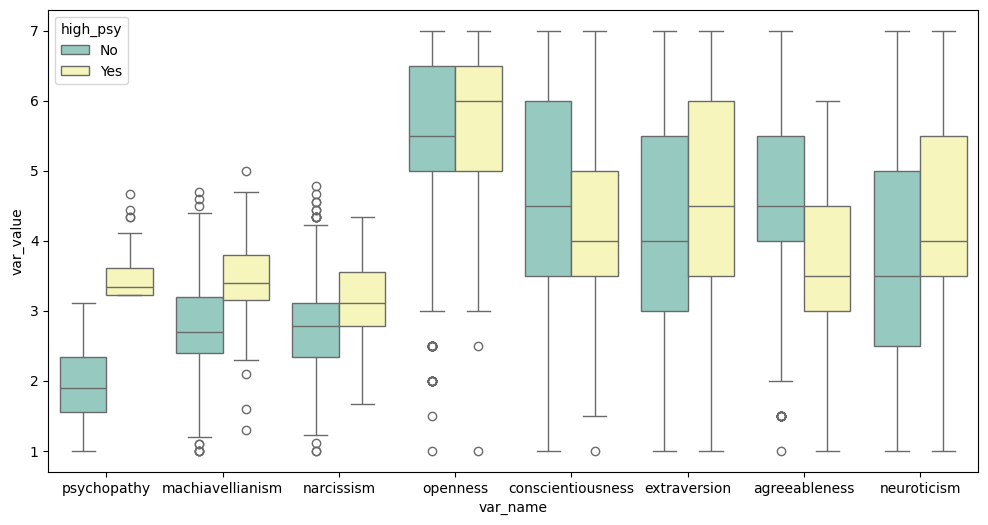

In [ ]:
data1 = data.iloc[:, list(range(0, 9)) + [109]]
long_data1 = pd.melt(data1, id_vars=['uid','high_psy'], var_name='var_name', value_name='var_value')
plt.figure(figsize=(12, 6))
sns.boxplot(x="var_name", y="var_value", hue="high_psy",data=long_data1, palette="Set3")

In the graph, notable differences are observed in **machiavellianism**, **narcissism**, **agreeableness**, and **neuroticism** between the two cohorts. This indicates that the scores of these four variables make a substantial contribution to the diagnosis of high psychopathy. However, for a more rigorous interpretation, statistical tests should be conducted.

#### **Twitter Activity**

Organize the 100 variables into groups based on their magnitudes (0-1, 1-10, 10-1000, 1000-10000) and generate box plots for each group. To improve code readability, a plotting function has been encapsulated.

In [ ]:
def plot_boxplot(data, column_indices):
    data = data.iloc[:, column_indices]
    long_data = pd.melt(data, id_vars=['uid','high_psy'], var_name='var_name', value_name='var_value')
    plt.figure(figsize=(24, 6))
    # Set y-axis to logarithmic scale to visualize data with extreme outliers.
    plt.yscale('log')
    sns.boxplot(x="var_name", y="var_value", hue="high_psy", data=long_data, palette="Set3")

In [ ]:
mean_values = {f'Var{i}': data.iloc[:, i + 8].mean() for i in range(1, 101)}
mean_indices = {0: [], 1: [], 10: [], 100: [], 1000: []}
for var, mean_value in mean_values.items():
    index = int(var[3:]) + 8
    if mean_value >= 0 and mean_value < 1:
        mean_indices[0].append(index)
    elif mean_value >= 1 and mean_value < 10:
        mean_indices[1].append(index)
    elif mean_value >= 10 and mean_value < 100:
        mean_indices[10].append(index)
    elif mean_value >= 100 and mean_value < 1000:
        mean_indices[100].append(index)
    elif mean_value >= 1000 and mean_value < 10000:
        mean_indices[1000].append(index)

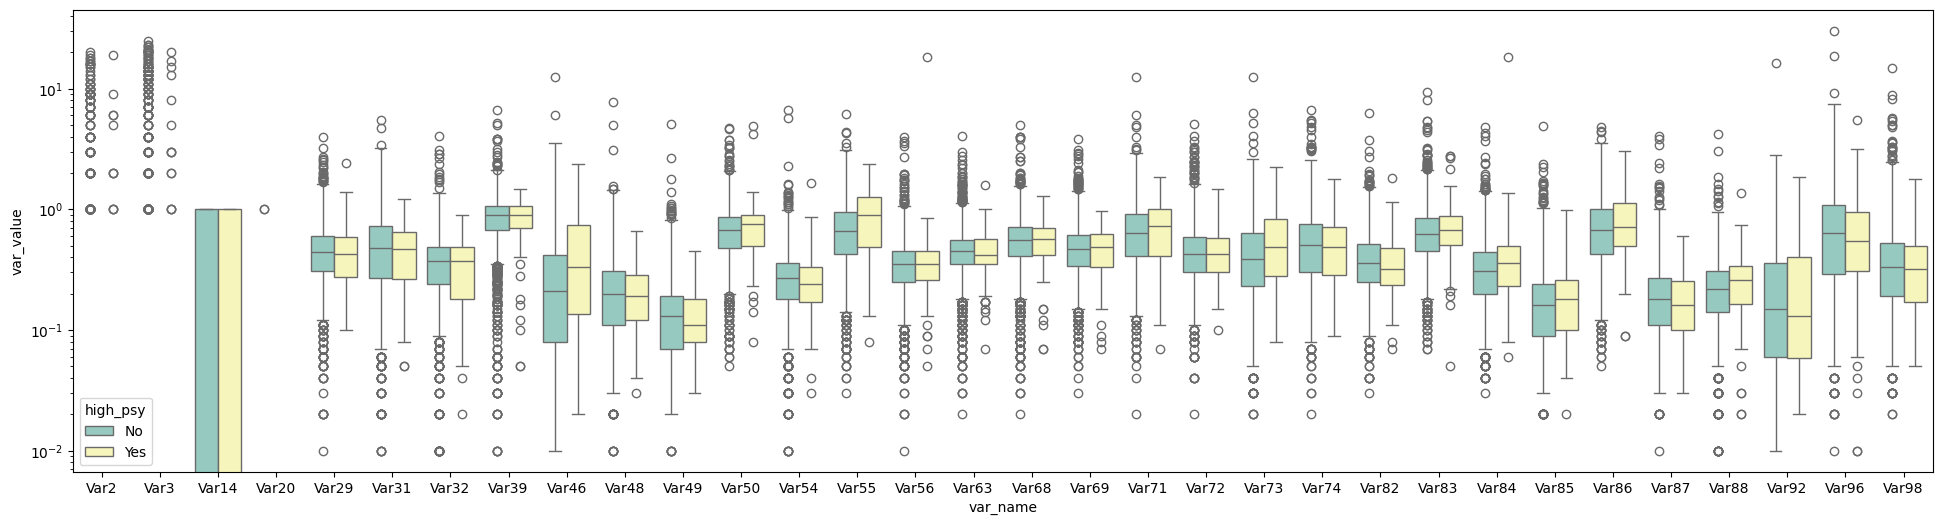

In [ ]:
plot_boxplot(data, list(mean_indices[0]) + [109]+[0])

From the graph, it can be observed that there are substantial differences in the data distribution of **Var46**, **Var55**, **Var73**, **Var88** across different groups (statistical testing is necessary to draw definitive conclusions). In fact, I have conducted a statistical test to verify the hypothesis, where $H_0$ states that there is no significant difference in the distributions of the two samples, the hypothesis is rejected if the p-value is less than 0.05. The same principle applies to the subsequent selection process.

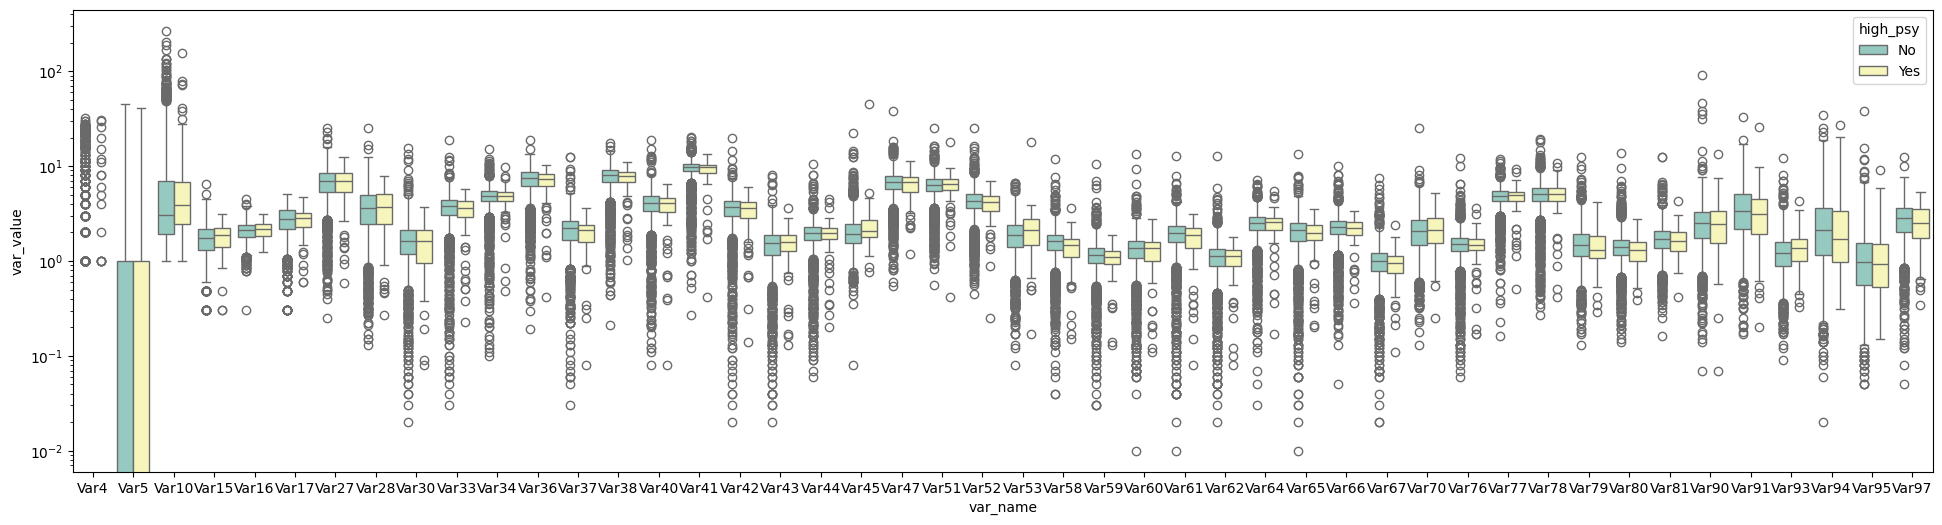

In [ ]:
plot_boxplot(data, list(mean_indices[1]) + [109]+[0])

From the graph, it can be observed that there are substantial differences in the data distribution of **Var37**, **Var45**, **Var53**, **Var58**, **Var59**, **Var80** across different groups.

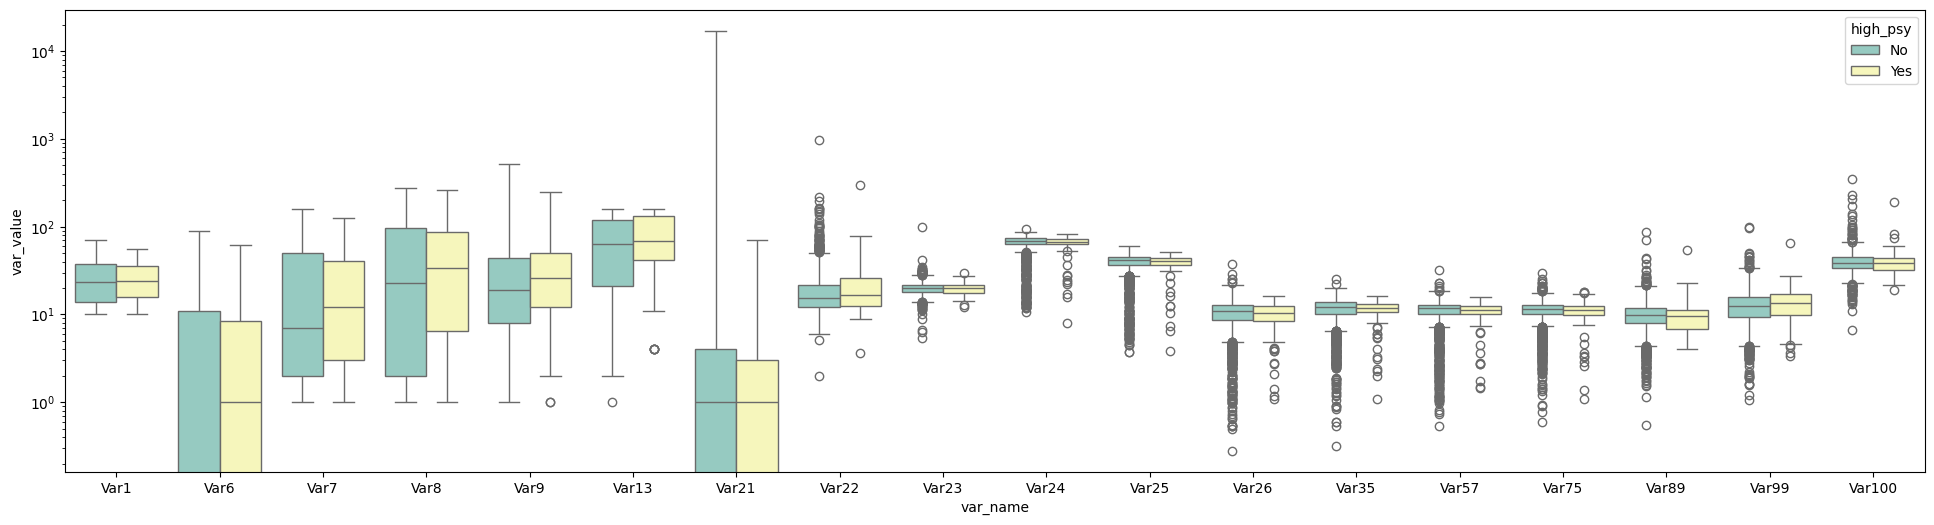

In [ ]:
plot_boxplot(data, list(mean_indices[10]) + [109]+[0])

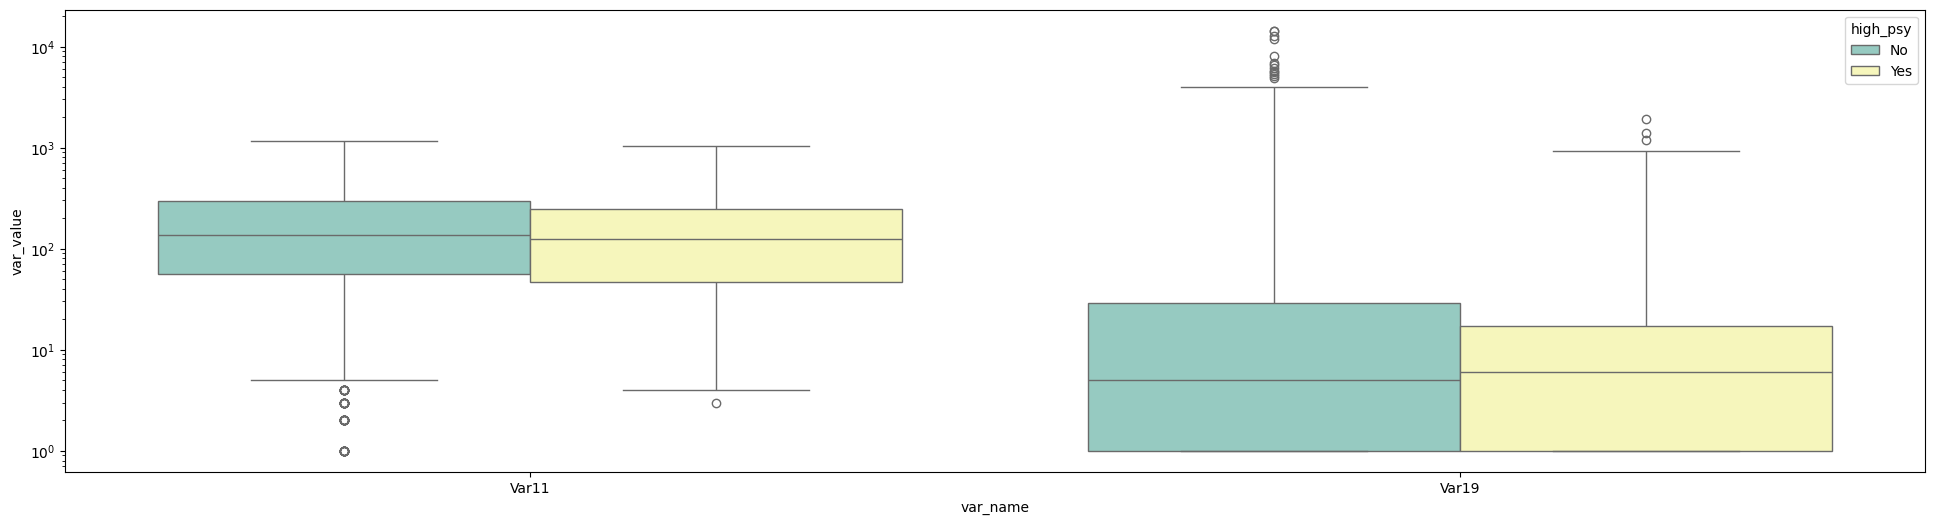

In [ ]:
plot_boxplot(data, list(mean_indices[100]) + [109]+[0])

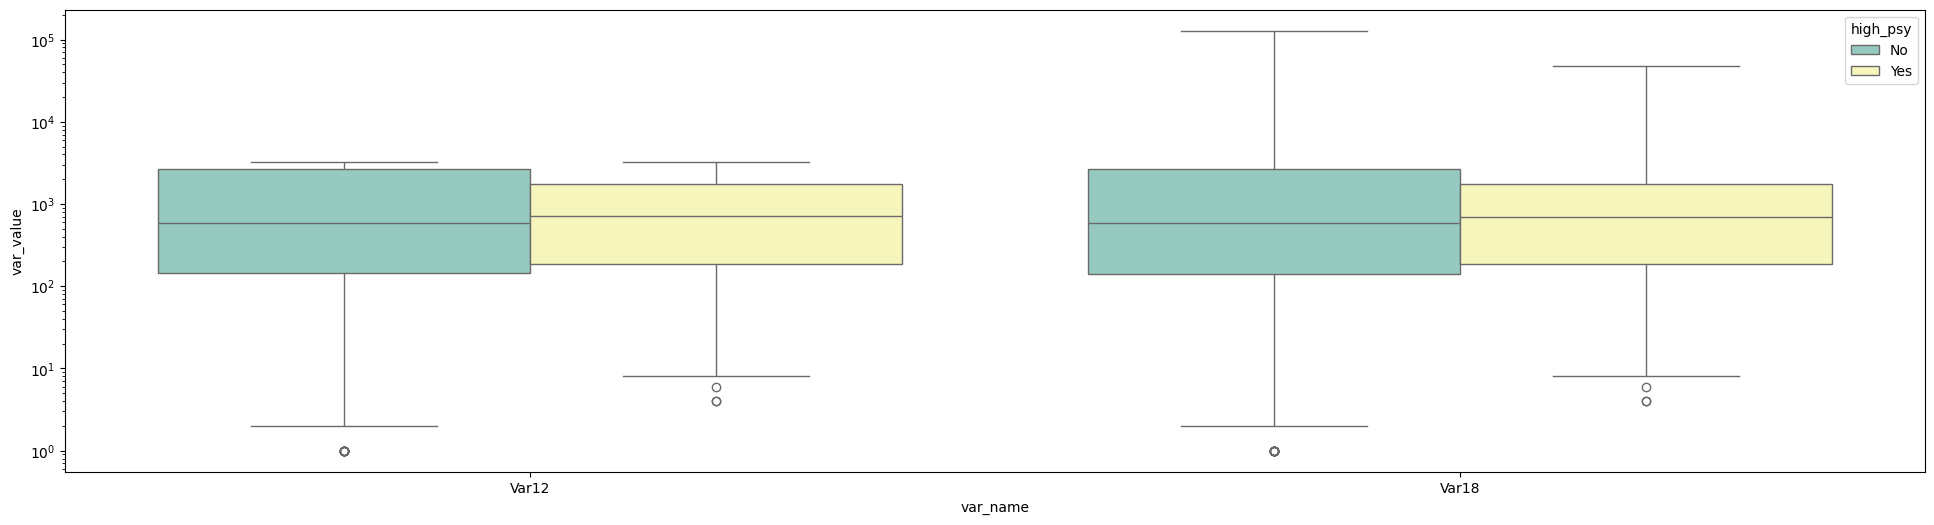

In [ ]:
plot_boxplot(data, list(mean_indices[1000]) + [109]+[0])

To enhance model efficiency, the focus will now shift towards in-depth analysis of the variables with significant differences.

To compare the correlation between variables, the Pearson correlation coefficient $$ \small r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}} $$ is computed and a heatmap is created for visualization.

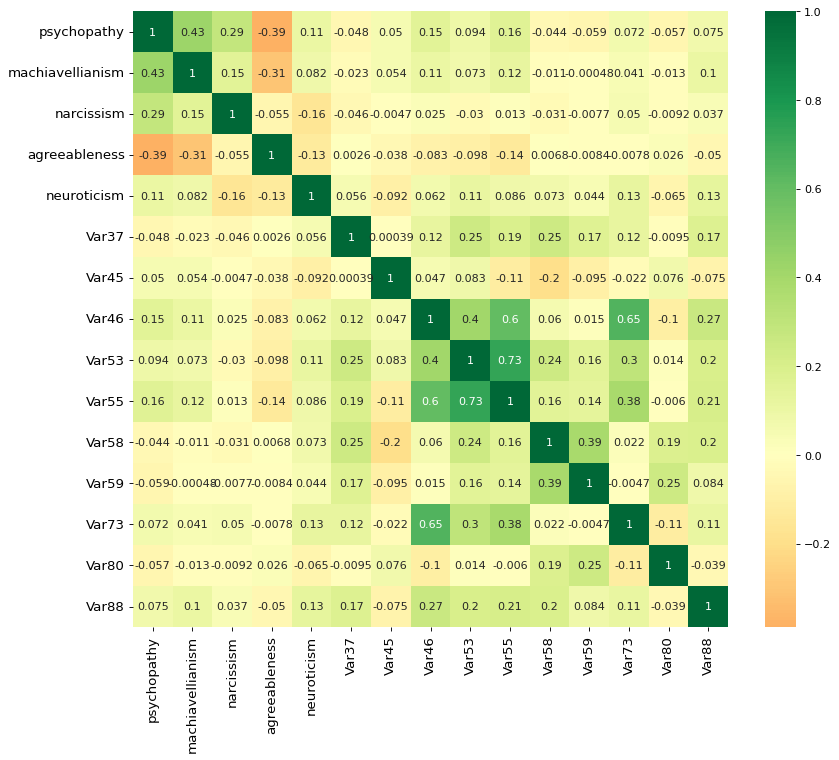

In [ ]:
deep_data = data.iloc[:, [0, 1, 2, 3, 7, 8, 45, 53, 54, 61, 63, 66, 67, 81, 88, 96, 109]]
deep_data_corr = deep_data.drop(data.columns[[0, 109]], axis=1)
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(deep_data_corr.corr(), xticklabels=deep_data_corr.corr().columns, yticklabels=deep_data_corr.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

It can be observed that there is no significant linear correlation between the Twitter activity variable and the Individual Self-assessment Results variable. However, upon examining the scatter plot of these two variables, it becomes apparent that as the Individual Self-assessment Results variable increases, the mean values of the Twitter activity variable across discrete values(red) show a gradual increase or decrease.

To gain a rough understanding of the correlation between the Twitter activity variable and the personal self-assessment variable, an attempt is made to construct a dataset based on average values.

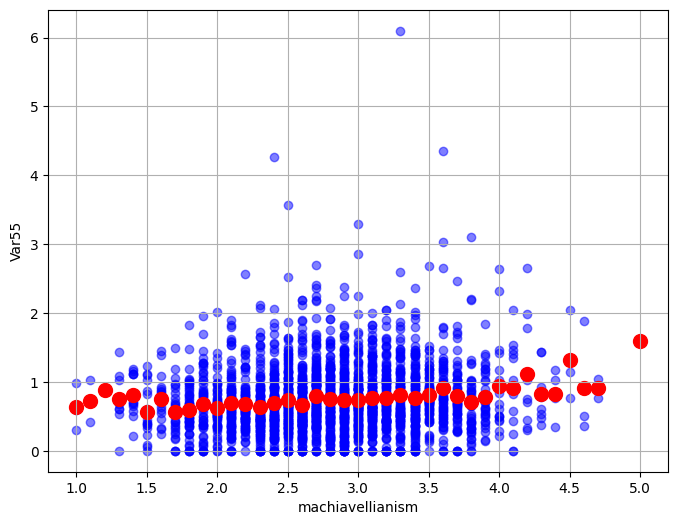

In [ ]:
eg_mean = data.groupby('machiavellianism')['Var55'].mean()
plt.figure(figsize=(8, 6))
plt.scatter(data['machiavellianism'], data['Var55'], color='blue', alpha=0.5)
for v, m in eg_mean.items():
    plt.scatter(v, m, color='red', marker='o', s=100, label='Mean')
plt.xlabel('machiavellianism')
plt.ylabel('Var55')
plt.grid(True)
plt.show()

[Text(0, 0.5, 'psychopathy'),
 Text(0, 1.5, 'machiavellianism'),
 Text(0, 2.5, 'narcissism'),
 Text(0, 3.5, 'agreeableness'),
 Text(0, 4.5, 'neuroticism')]

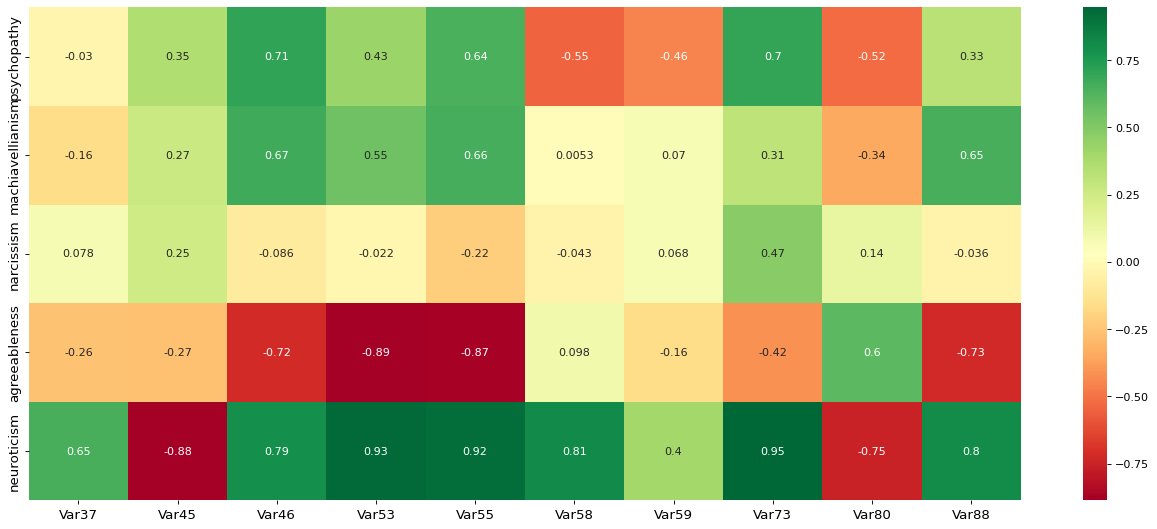

In [ ]:
def cal_mean_corr(V1, MV2):
  new_data = data.groupby(V1)[MV2].mean().reset_index()
  new_data.columns = ['A', 'Mean_B']
  corr = new_data['A'].corr(new_data['Mean_B'])
  return corr
psychopathy = []
machiavellianism = []
narcissism = []
agreeableness = []
neuroticism = []
for column in deep_data.columns:
    if column.startswith('Var'):
        corr = cal_mean_corr('psychopathy', column)
        psychopathy.append(corr)
for column in deep_data.columns:
    if column.startswith('Var'):
        corr = cal_mean_corr('machiavellianism', column)
        machiavellianism.append(corr)
for column in deep_data.columns:
    if column.startswith('Var'):
        corr = cal_mean_corr('narcissism', column)
        narcissism.append(corr)
for column in deep_data.columns:
    if column.startswith('Var'):
        corr = cal_mean_corr('agreeableness', column)
        agreeableness.append(corr)
for column in deep_data.columns:
    if column.startswith('Var'):
        corr = cal_mean_corr('neuroticism', column)
        neuroticism.append(corr)
mean_corr = np.array([psychopathy, machiavellianism, narcissism, agreeableness, neuroticism]).reshape(5, 10)
plt.figure(figsize=(20,8), dpi= 80)
mean_heat = sns.heatmap(mean_corr, annot=True, cmap='RdYlGn')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
mean_heat.set_xticklabels(['Var37', 'Var45', 'Var46', 'Var53', 'Var55', 'Var58', 'Var59', 'Var73', 'Var80', 'Var88'])
mean_heat.set_yticklabels(['psychopathy', 'machiavellianism', 'narcissism', 'agreeableness', 'neuroticism'])

As can be observed from the graph:

* Most Twitter activity variables (means) are moderately correlated with **psychopathy**, with **Var46**, **Var55**, and **Var73** showing strong **positive correlations**.

* Most Twitter activity variables (means) are moderately correlated with **machiavellianism**, with **Var46**, **Var55**, and **Var88** showing strong **positive correlations**.

* There is **no significant correlation** between **narcissism** and the Twitter activity variables (means), with **Var73** showing a **weak positive correlation**.

* Most Twitter activity variables (means) are significantly correlated with **agreeableness**, with **Var46**, **Var53**, **Var55**, and **Var88** exhibiting substantial **negative correlations**.

* Most Twitter activity variables (means) are significantly correlated with **neuroticism**, with **Var53**, **Var55**, **Var58**, and **Var73** showing strong **positive correlations**, and **Var45** and **Var80** exhibiting substantial **negative correlations**.

In [ ]:
%%html
<span style="background-color: yellow; font-weight: bold; font-size: larger;">In general, Twitter activity can to some extent reflect neuroticism scores, thereby inferring high levels of psychopathy, with Var46 and Var55 variables being particularly crucial.</span>

Question: How to utilize the identified key variables for predicting high-risk individuals for psychopathys?

Classifying Users into High Psychopathic and Normal Groups Using Logistic Regression:
$$\small P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}$$

Where $Y$ represents whether there is a high risk of psychopathy, and $X_i$ denotes the $i^{th}$ important variable.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
X = data[['Var37', 'Var45', 'Var46', 'Var53', 'Var55', 'Var58', 'Var59', 'Var73', 'Var80', 'Var88']]
y = data['high_psy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('confusion_matrix:')
print(conf_matrix)

accuracy: 0.9595141700404858
confusion_matrix:
[[474   0]
 [ 20   0]]


It can be noted that all individuals with high psychopathy are classified within the normal range. This could be due to the small proportion of individuals with high psychopathy levels in the population, indicating the presence of data imbalance.

Given that the minority class samples constitute approximately 3% of the total dataset, an attempt is made to augment the minority class samples by a factor of 32 and incorporate them into the original dataset.

In [ ]:
yes_samples = data[data['high_psy'] == 'Yes']
repeated_samples = yes_samples.copy()
for i in range(32):
    repeated_samples = pd.concat([repeated_samples, yes_samples])
new_data = pd.concat([data, repeated_samples], ignore_index=True)

accuracy: 0.6451310861423221
confusion_matrix:
[[273 204]
 [175 416]]


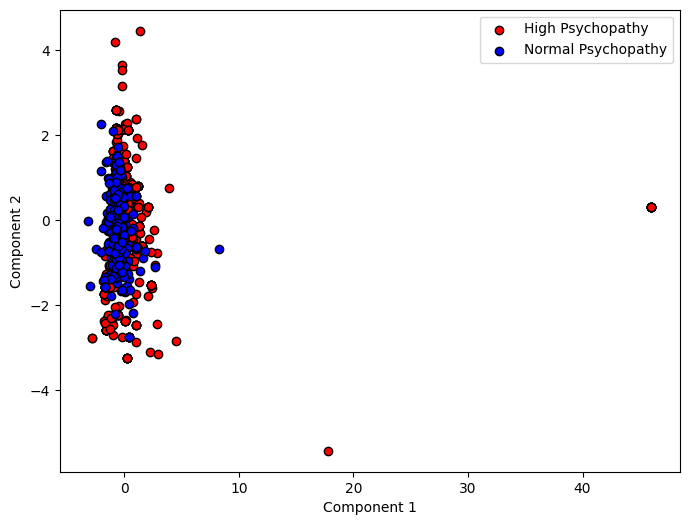

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
X = new_data[['Var37', 'Var45', 'Var46', 'Var53', 'Var55', 'Var58', 'Var59', 'Var73', 'Var80', 'Var88']]
y = new_data['high_psy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#To facilitate visualization.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('confusion_matrix:')
print(conf_matrix)
colors = ['blue' if pred == 'No' else 'red' for pred in y_pred]
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[y_pred=='Yes', 0], X_test_pca[y_pred=='Yes', 1], c='red', edgecolors='k', label='High Psychopathy')
plt.scatter(X_test_pca[y_pred=='No', 0], X_test_pca[y_pred=='No', 1], c='blue', edgecolors='k', label='Normal Psychopathy')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

It is evident that the classification results are not satisfactory; however, there has been an increase in the detection rate among individuals with high psychopathy. Therefore, it is necessary to select an appropriate parameter for oversampling.

#### **Summary**

In addition to the aforementioned observations, there are other important considerations to note: There is no clear correlation between the variables of Individual Self-assessment Results and Twitter activity. Therefore, using Twitter activity for prediction is not rigorous, particularly as Twitter activity primarily influences certain personality dimensions (such as agreeableness and neuroticism) to impact overall psychopathy scores.

In [ ]:
%%html
<span style="background-color: yellow; font-weight: bold; font-size: larger;">Twitter activity is challenging to directly reflect an individual's psychopathy score. However, statistically, it does have an impact on certain personality dimensions, such as agreeableness and neuroticism.</span>

Next steps include:

* Exploring the potential associations between significant Twitter activity variables and certain personality dimensions.

* To enhance the understanding of differences in data distribution between box plots, it is necessary to add p-value annotations to each pair of box plots to better identify significant variables.

* To minimize the footprint of visual representations, interactive buttons should be incorporated for grouping images, thereby making data reports more concise and visually appealing.